<a href="https://colab.research.google.com/github/jxlyn/CSCI-4962-Projects-ML-A/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 (10 points): Describe a machine learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic regression is the best choice for solving this problem.**

A machine learning problem that I would like to solve using Logistic Regression is predict whether or not a person will win a wrestling game. Predict the winner of the wrestling game have been a popular research recently. There are a lots of important factors that will affect the ability of the wrestlers significantly, such as their weight, height, training hours, strength, the number of sports they do... The Logistic Regression model can analyze the relationship between these independent factors and the winning rate of a wrestler and give the binary output (whether the wrestler can beat other wrestlers or not) based on the analysis. Thus, the Logistic Regression is the best choice for solving this problem since it will provide an accurate prediction based on the data.



**Task 2 (20 points): Pick a publicly available dataset (except The Titanic Dataset because we already discussed that in class) that you will use to solve this problem. You must provide a link to the dataset and perform necessary Exploratory Data Analysis (EDA). Clearly demonstrate the
steps you follow for your EDA with a justification of why these were required. For example, if the dataset has lot of missing values, then why did you use a specific technique when handling missing data.**

In [2]:
# data source: https://www.kaggle.com/datasets/julienjta/wrestling-world-tournament?resource=download
import pandas as pd
from pandas import Series, DataFrame
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

drive.mount('/content/drive')

data = pd.read_csv('drive/My Drive/ML and AI/Hw1/data.csv')
data.head()

Mounted at /content/drive


,Unnamed: 0,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


The data set shows the information on the different wrestlers morphology, how they practice, their strength score, agility score, mental abilities, federation, and ranks in the tournament. For the first 5 people from the data set, it seems the data is uniform and clean. However, we need to check if there's a missing values in the data set.

In [ ]:
data.isna()

,Unnamed: 0,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We can see that our data set doesn't have any missing values which is great for our analysis process.

In [ ]:
data.describe()

,Unnamed: 0,age,height,weight,hours_per_day,strength,agility,mental,year_start,rank
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,249.500000,31.154000,174.864000,89.688000,3.064000,6.152000,7.148000,6.732000,2007.13000,250.500000
std,144.481833,5.438514,9.468623,11.081889,1.375386,1.567741,1.455449,1.197934,6.32591,144.481833
min,0.000000,18.000000,152.000000,65.000000,0.000000,2.000000,3.000000,3.000000,1986.00000,1.000000
25%,124.750000,27.000000,167.500000,81.000000,2.000000,5.000000,6.000000,6.000000,2003.00000,125.750000
50%,249.500000,31.000000,174.000000,89.000000,3.000000,6.000000,7.000000,7.000000,2007.00000,250.500000
75%,374.250000,35.000000,181.625000,98.000000,4.000000,7.000000,8.000000,8.000000,2011.00000,375.250000
max,499.000000,53.000000,202.000000,123.000000,8.000000,10.000000,10.000000,10.000000,2021.00000,500.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     500 non-null    int64  
 1   name           500 non-null    object 
 2   gender         500 non-null    object 
 3   age            500 non-null    int64  
 4   height         500 non-null    float64
 5   nationality    500 non-null    object 
 6   weight         500 non-null    int64  
 7   sports         500 non-null    object 
 8   hours_per_day  500 non-null    int64  
 9   strength       500 non-null    int64  
 10  agility        500 non-null    int64  
 11  mental         500 non-null    int64  
 12  federation     500 non-null    object 
 13  year_start     500 non-null    int64  
 14  rank           500 non-null    int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 58.7+ KB


In [ ]:
# the size of the data set
data.shape

(500, 15)

In [ ]:
data.nunique()

Unnamed: 0       500
name             500
gender             2
age               30
height            83
nationality        8
weight            53
sports            31
hours_per_day      9
strength           9
agility            8
mental             8
federation         3
year_start        33
rank             500
dtype: int64

By looking at the above data, we can see that there's no outliers in the data, the standard deviation is not much, the difference between maximum and minimum is not much either. We can remove the unnecessary information in the data - gender, nationality, and federation since these factors don't have impact on the ability of wrestlers.

In [ ]:
new_data = data.copy()
new_data = new_data.drop(["gender", "nationality", "federation","name","sports","Unnamed: 0"], axis=1)

new_data

,age,height,weight,hours_per_day,strength,agility,mental,year_start,rank
0,41,165.0,82,3,7,8,7,1989,42
1,36,185.0,100,0,8,5,9,2006,161
2,29,178.5,93,4,8,8,7,2012,153
3,39,187.5,107,3,7,6,8,2003,252
4,29,158.0,72,1,5,7,7,2012,360
...,...,...,...,...,...,...,...,...,...
495,34,185.5,104,2,9,6,5,2008,353
496,31,161.5,71,5,4,9,6,2003,74
497,22,188.5,102,3,8,8,7,2021,265
498,32,177.0,92,2,5,5,5,2012,499


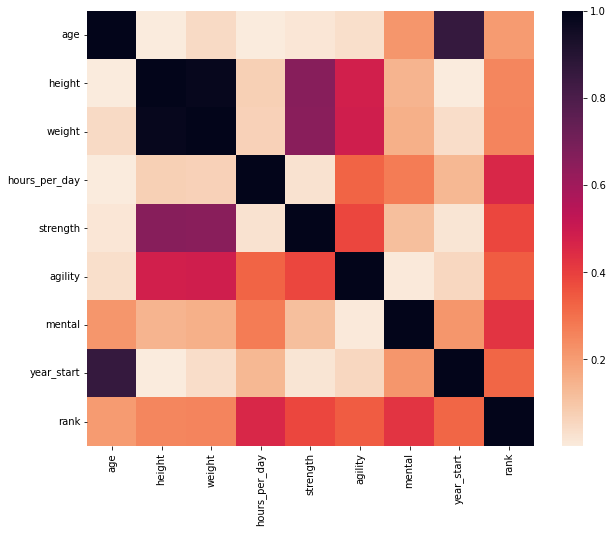

In [ ]:

# generate the correlation plot
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(new_data.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

#plt.figure(figsize = (20,20))
#corr = new_data.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

By examining above graph, we can see that there's strong correlation between height and strength, weight and strength, age; year start and practice hour per day and rank; agility and weight; agility and height.

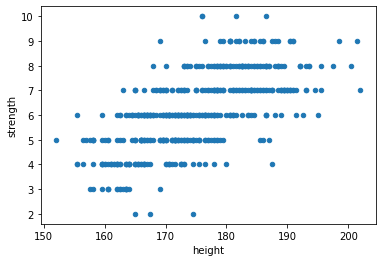

In [ ]:
# create the scatter plot for height and strength
new_data.plot(kind='scatter', x='height', y='strength')

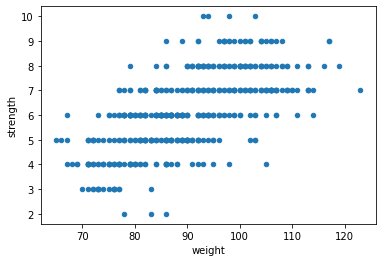

In [ ]:
# create the scatter plot for weight and strength
new_data.plot(kind='scatter', x='weight', y='strength')

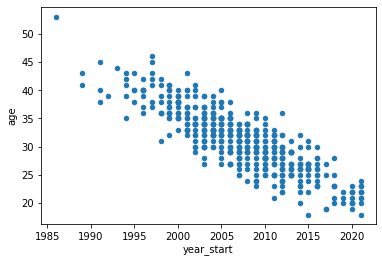

In [ ]:
# create the scatter plot for year start and age
new_data.plot(kind='scatter', x='year_start', y='age')

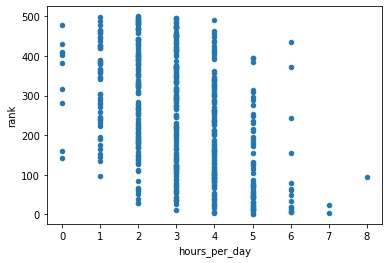

In [ ]:
# create the scatter plot for hours practice per day and rank
new_data.plot(kind='scatter', x='hours_per_day', y='rank')

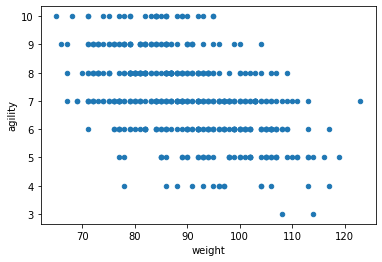

In [ ]:
# create the scatter plot for weight and agility
new_data.plot(kind='scatter', x='weight', y='agility')

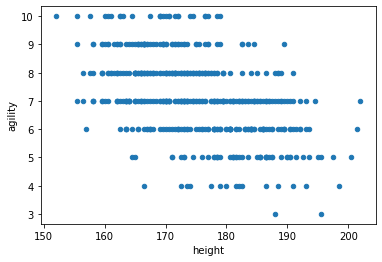

In [ ]:
# create the scatter plot for height and agility
new_data.plot(kind='scatter', x='height', y='agility')

By looking at above scatter plots, we can infer that as the height increases, the strength increases, agility decreases. As the weight increases, the strength increases, agility decreases. As the year of start increases, the age in wrestlers deceases. As the practice hour per day increases, the rank becomes higher.

**Task 3 (35 points): Implement Logistic Regression in this step. Clearly write your cost function
and derivatives before implementing gradient descent. Do not use any built-in packages for this
step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants
of gradient descent in their original form. (Refer to the research paper discussed in class).**

**Prediction:** $\hat{y} = \sigma(w^Tx + b)  = (a^{(1)}, a^{(2)}, ..., a^{(n-1)}, a^{(n)})$ where $\sigma(a) = \frac{1}{(1+e^{-a})}$, $a = w^Tx + b$

**Loss function:** $l^i(y^{(i)}, \hat{y}) = -(y^{(i)}\log\hat{y}^{(i)} + (1-y^{(i)})\log (1-\hat{y}^{(i)})$

**Cost function:** $L(y, \hat{y})= \frac{1}{n}\sum\limits_{i=1}^nl^i(y^{(i)}, \hat{y}^{(i)}) = -\frac{1}{n}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$



**Derivatives:**

$\frac{d\sigma}{da} = \frac{e^{-a}}{(1+e^{-a})^2} = \sigma(a)(1-\sigma(a))$

$\frac{\partial L}{\partial w} = -\frac{1}{n}\sum\limits_{i=1}^n y^{(i)}\cdot \frac{1}{\hat{y}^{(i)}}\cdot \frac{\partial \hat{y}^{(i)}}{\partial w} + (1 - y^{(i)}) \cdot \frac{1}{1-\hat{y}^{(i)}}\cdot -\frac{\partial ( 1- \hat{y}^{(i)})}{\partial w} =$

$-\frac{1}{n} \sum \limits_{i=1}^n (1- \hat{y}^{(i)})y^{(i)}x^{(i)} + (1-y^{(i)}) \cdot -(\hat{y}^{(i)}x^{(i)}) = -\frac{1}{n}\sum\limits_{i=1}^nx^{(i)}(y^{(i)} - \hat{y}^{(i)})$

 $\frac{\partial L}{\partial w} = \frac{ x \cdot(\hat{y} - y)^T }{n} = \frac{ x \cdot(a-y)^T }{n}$

$\frac{\partial L}{\partial b} = \frac{1}{n}\sum\limits_{i=1}^n (a^{(i)}-y^{(i)})$


In [9]:
np.seterr(divide = 'ignore') 
# use all training data for 1 forward pass and then adjust weight
def BGD_model(X,Y,epochs, learning_rate =0.001):
    factors = X.shape[1]
    w = np.ones(shape = (factors),dtype=float)
    b = 0
    num_sample = X.shape[0]
    cost_list = []
    epoch_list = []

    for i in range(epochs):
      #using the formula given in the lecture
      A = 1/(np.exp( - (np.dot(w, X.T) + b))+1)
      #print(A)
      #print(Y)
      #print(np.log(A))
      #print(np.log(1-A))
      if (A.all()>1):
        cost = (-1/num_sample) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
        if i%10 ==0:
          cost_list.append(cost)
          epoch_list.append(i)

      dw = np.dot(X.T, (A-Y).T)/num_sample
      db = np.sum(A-Y)/num_sample
      
      w = w - (learning_rate * dw)
      b = b - (learning_rate * db)

      
    return w, b, cost_list, epoch_list


# use 1 randomly picked sample for a forward pass and then adjust weights
def SGD_model(X,Y,epochs, learning_rate =0.001):
  factors = X.shape[1]
  w = np.ones(shape = (factors),dtype=float)
  b = 0
  num_sample = X.shape[0]
  cost_list = []
  epoch_list = []

#algorithm from the paper
# for i in range ( nb_epochs ):
#np . random . shuffle ( data )
#for example in data :
#params_grad = evaluate_gradient ( loss_function , example , params )
#params = params - learning_rate * params_grad
  for i in range(epochs):
    np.random.shuffle(X)
    np.random.shuffle(Y)
    for j in range(len(X)):
      A = 1/(np.exp( - (np.dot(w, X[j].T) + b))+1)

      #make sure we can calculate the cost correctly, avoid calling np.log(0)
      if (A.all()>1):
          cost = (-1/num_sample)* np.sum(Y[j] * np.log(A) + (1-Y[j]) * np.log(1-A))
          if i%10 ==0:
            cost_list.append(cost)
            epoch_list.append(i)

      dw = np.dot(X[j].T, (A-Y[j]).T)/num_sample
      db = np.sum(A-Y[j])/num_sample
      
      w = w - (learning_rate * dw)
      b = b - (learning_rate * db)  
    
    return w, b, cost_list, epoch_list

def prediction(X, Y, w, b):
  A = 1/(np.exp( - (np.dot(w, X.T) + b))+1)
  predictions = [1 if i > 0.5 else 0 for i in A]
  same = 0
  for j in range(len(predictions)):
    if predictions[j] == Y[j]:
        same +=1
  return same,predictions

new_data2 = data.copy()

X = new_data2.drop(["gender", "nationality", "federation","name","sports","Unnamed: 0"], axis=1)
X = X.to_numpy()

Y = new_data2.drop(["gender", "nationality", "federation","name","sports","Unnamed: 0"], axis=1)
Y = Y.pop("rank").values

## NOTE: only 1 of the 500 people will win the wrestling game against all others (rank =1)
## this data set may be imbalanced
train_X , test_X, train_Y, test_Y = train_test_split(X,Y,train_size =0.8,test_size=0.2)
bgd_w, bgd_b, bgd_cost , bgd_epoch = BGD_model(train_X,train_Y,9999,0.001)
sgd_w, sgd_b, sgd_cost , sgd_epoch = SGD_model(train_X,train_Y,9999,0.001)

same, pred = prediction(train_X,train_Y,bgd_w,bgd_b)
bgd_percent = same / len(test_Y)
print(f"The batch gradient descent accuracy is : {bgd_percent}")
print(f"confusion matrix for batch gradient descent: \n{confusion_matrix(train_Y, pred)}")

same2, pred2 = prediction(train_X,train_Y,sgd_w,sgd_b)
sgd_percent = same2 / len(test_Y)
print(f"The stochastic gradient descent accuracy is : {sgd_percent}")
print(f"confusion matrix for stochastic gradient descent: \n{confusion_matrix(train_Y, pred2)}")

The batch gradient descent accuracy is : 0.01
confusion matrix for batch gradient descent: 
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
The stochastic gradient descent accuracy is : 0.01
confusion matrix for stochastic gradient descent: 
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


**Task 4 (35 points): Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’
gradient descent. Implement both. You may implement these algorithms yourself OR use a
package. In your conclusion, compare both optimization techniques/algorithms with respect to
the results you achieve. Also compare these results with the original implementation of
gradient descent (Task 3 above). Describe why or why not should we use optimization
algorithms for the task at hand.**

In [ ]:
def SGD_momentum_model(X,Y, epochs,learning_rate ):
  #according to the paper the momentum term γ is usually set to 0.9 or a similar value.
   momentum = 0.9
   factors = X.shape[1]
   w = np.ones(shape = (factors))
   b = 0
   num_sample = X.shape[0]
   cost_list = []
   epoch_list = []
  
   for i in range(epochs):
    np.random.shuffle(X)
    np.random.shuffle(Y)
    for j in range(len(X)):
      A = 1/(np.exp( - (np.dot(w, X[j].T) + b))+1)

      if (A.all()>1):
        cost = -1/num_sample * np.sum(Y[j] * np.log(A) + (1-Y[j]) * np.log(1-A))
        if i%10 ==0:
          cost_list.append(cost)
          epoch_list.append(i)

      dw = np.dot(X[j].T, (A-Y[j]).T)/num_sample
      db = np.sum(A-Y[j])/num_sample
      w = w - ((momentum * w) + (learning_rate * dw))
      b = b - ((momentum * b) + (learning_rate * db))

    return w, b, cost_list, epoch_list

def adagrad_model(X,Y, epochs,learning_rate ):
   factors = X.shape[1]
   gti = np.zeros(len(X[0]))
   w = np.ones(shape = (factors))
   b = 0
   num_sample = X.shape[0]
   cost_list = []
   epoch_list = []
   epsilon = 1e-8

   for i in range(epochs):
     np.random.shuffle(X)
     np.random.shuffle(Y)
     for j in range(len(X)):
       A = 1/(np.exp( - (np.dot(w, X[j].T) + b))+1)
       dw = np.dot(X[j].T, (A-Y[j]).T)/num_sample
       db = np.sum(A-Y[j])/num_sample
       gti = gti +np.square(dw)
       w = w - (learning_rate/(np.sqrt(gti)+epsilon))
       b = b - (learning_rate * db)

       if (A.all()>1):
         cost = -1/num_sample * np.sum(Y[j] * np.log(A) + (1-Y[j]) * np.log(1-A))
         if i%10 ==0:
           cost_list.append(cost)
           epoch_list.append(i)
   return w, b, cost_list, epoch_list

m_w, m_b, m_cost , m_epoch = SGD_momentum_model(train_X,train_Y,9999,0.001)
a_w, a_b, a_cost , a_epoch = adagrad_model(train_X,train_Y,9999,0.001)

same3, pred3 = prediction(train_X,train_Y,m_w,m_b)
m_percent = same3 / len(test_Y)
print(f"The stochastic gradient descent with momentum accuracy is : {m_percent}")
print(f"confusion matrix for stochastic gradient descent with momentum: \n{confusion_matrix(train_Y, pred3)}")

same4, pred4 = prediction(train_X,train_Y,a_w,a_b)
a_percent = same4 / len(test_Y)
print(f"The adagrad optimizer accuracy is : {a_percent}")
print(f"confusion matrix for adagrad optimizer: \n{confusion_matrix(train_Y, pred4)}")


The stochastic gradient descent with momentum accuracy is : 0.01
confusion matrix for stochastic gradient descent with momentum: 
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
The adagrad optimizer accuracy is : 0.01
confusion matrix for adagrad optimizer: 
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


I implemented stochastic gradient descent with momentum and adagrad optimizers. The stochastic gradient desent with momentum accelerated the stochastic gradient descent by multiply the momentum by the velocity. It increases the rate that gradients points going to the same direction and reduce the rate of grdients points going to the different direction. The accuracy of the stochastic gradient descent with momentum rate for my model is same as the accuracy of stochastic gradient descent. The stochastic gradient descent with adagrad used the partial derivative (gti) of the wrt to the parameter theta at the time step t. The adagrad optimizer will reduce the number of updates as more updates a parameter receives. The accuracy of my stochastic gradient descent with adagrad is same as the accuracy for other gradient descents (0.1). I think this is due to the imbalance in my data set. Only 1 out of 500 people will win the wrestling game. Thus, the accuracy is low. We should use the optimization for the task at hand because theoretically they improve the accuracy and decrease the rate of error for the gradient descent. Eventhough I can't see it on my dataset since my dataset is imbalanced, I believe that the stochastic gradient descent with momentum is better for my data because this method will reduce the noise on my data. For the factors on my data, some of them only have little effect on the rank. 